In [1]:
import pandas as pd

In [2]:
# https://www.kaggle.com/mirichoi0218/insurance
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


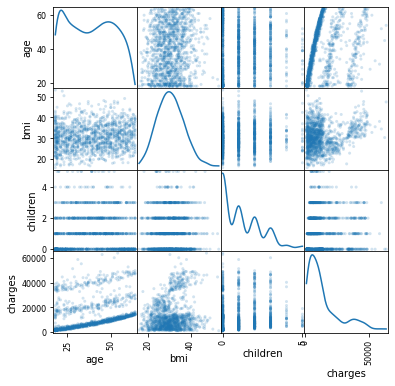

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')
plt.show()

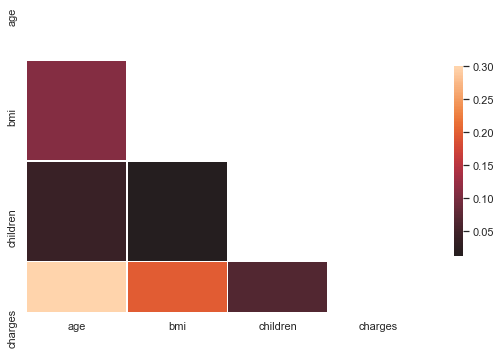

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white")

corr = df[['age', 'bmi', 'children', 'charges']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
df1 = pd.get_dummies(data = df, prefix = ['sex', 'smoker', 'region'], 
                     columns = ['sex', 'smoker', 'region'], drop_first = True)
colnames = df1.columns.to_list()
ch = colnames.index('charges')
df1 = df1[colnames[:ch] + colnames[ch + 1:] + [colnames[ch]]]
df1.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


In [6]:
df1.to_csv('insurance.txt', header=False, index=False)

In [7]:
%%bash
g++ -Wall -larmadillo main.cpp defs.h split.h metrics.h linreg.h -o LR
./LR

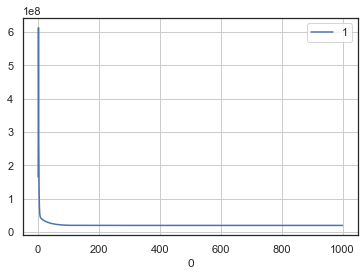

In [8]:
# plotting convergence
%matplotlib inline
hist = pd.read_csv("cost_history.out", header = None)
hist.plot(x = 0, y = 1, grid = True)
plt.show()

In [9]:
# coefficients (obtained with normal equations and gradient descent)
with open("coefficients.out") as c:
    print(c.read())

************************************************************************************************** 
  -1.2299e+04   2.6378e+02   3.3386e+02   5.8188e+02  -1.6951e+02   2.3810e+04  -1.7900e+02  -7.6415e+02  -8.3965e+02
************************************************************************************************** 
************************************************************************************************** 
   7.6728e+03   3.7044e+03   1.9459e+03   5.7474e+02   3.8482e+02   2.1203e+04   8.3339e+02   6.7066e+02   2.4612e+02
************************************************************************************************** 



In [10]:
# model summary (normal eq. solution and grad. descent solution)
with open("model_summary.out") as model:
    print(model.read())

************************************************************************************************** 
RMSE train: ******4344
R squared: ***0.75074
Adjusted R squared: ***0.74886
Residuals:
*******Min: -30009
********1Q: -1550.9
****Median: 954.63
********3Q: 2927.7
*******Max: 11149
************************************************************************************************** 
************************************************************************************************** 
RMSE train: ****4424.7
R squared: ***0.74138
Adjusted R squared: ***0.73943
Residuals:
*******Min: -31252
********1Q: -985.77
****Median: 1471.9
********3Q: 3472
*******Max: 10107
************************************************************************************************** 



In [11]:
# prediction summary (normal eq. solution and grad. descent solution)
with open("predict_summary.out") as predict:
    print(predict.read())

************************************************************************************************** 
Correlation coef. between observations and predictions: ***0.86608
RMSE: ****3983.7
MAPE: ****37.652%
************************************************************************************************** 
************************************************************************************************** 
Correlation coef. between observations and predictions: ***0.85935
RMSE: ****4098.3
MAPE: ****43.178%
************************************************************************************************** 

